# Deep Learning Project 2  - Raniery Mendes


* Due latest by Friday 3/8

## Multi-class classification via neural networks

In this project, you will learn how to implement all the basic components of a neural network, including forward propagation, gradient computation, and back propagation, following the development framework presented by Professor Andrew Ng for [binary classification](https://www.youtube.com/watch?v=eqEc66RFY0I&list=PLkDaE6sCZn6Ec-XTbcX1uRg2_u4xOEky0&index=7). The activities in this project will help you gain valuable intuition regarding several of the fundamental programming techniques powering neural network libraries. You will also develop appreciation, through hands-on application, for some of the practical considerations involved in training a neural network. 

As in Project 1, we will use the MNIST dataset to experiment with binary and multi-class classification problems. 

### Learning outcomes
After completing project 2, you will be able to:
* Implement neural networks that use cross-entropy loss for binary classification 
* Apply ideas originating in binary classification to multi-class classification problems
* Describe and apply activation functions, such as sigmoid and softmax
* Understand the role of parameters and hyper parameter initialization

### Multi-class classification: the MNIST dataset
The MNIST dataset consists of 70,000 gray-scale images (samples) of hand-written digits 0 through 9. The multi-class classification problem consists of classifying each sample accurately as belonging to one of ten classes. This dataset is divided into training (60,000) and test (10,000) datasets. 

### 1. Logistic regression using a neural network implementation framework (50% undergrad, 30% grad)
Prof. Andrew Ng's Coursera videos, assigned in Module 2, explain how logistic regression can be implemented as a single neuron that receives images as input and predicts their classification into one of two classes (cats vs. non-cats in his videos). He explains in detail how the process can be separated into a forward pass, calculation of a loss function, and numerical optimization using gradient descent in the back propagation step. 

Your job for this part of the project is to implement the "logistic regression with a neural network mindset" approach described by Professor Ng. For this you, will use a Jupyter notebook provided as part of his Coursera course. A zip file (Logistic Regression as a Neural Network.zip) containing this notebook as well as other files and folders needed can be found as apart of the Google Classroom assignment.

#### Implementation requirements (50%)
* The Jupyter notebook contains step-by-step implementation instructions. Follow these instructions carefully.
* Your code should use the vectorization techniques learned from Prof. Ng's videos. **Pay attention to the order of dimensions of the data matrix X, they are ordered as (features, samples)** 
* You can use the cat/non-cat dataset to debug your implementation, but it's not required.

**Suggestions:** 
* Always keep the size of your matrices and vectors in mind to avoid confusion.
* Include some tests or sanity checks as you've seen in our homework assignment and in Prof. Ng's notebook.
* Avoid loops. Learn to use vectorization.

#### Application (20%)
Can we solve the 10-class MNIST classification problem using our binary classification logistic regression code? The answer is yes. Think about how to reframe the problem so that it can be solved via your binary classification code. Then explain how you are going to do this, discussing the pros and cons of your approach.  


#### Results and Analysis (30%)
Solve the classification problem and obtain performance results, be sure to specify (and experiment with) the value of $\alpha$, your hyperparameter. These results should include plots of the cost function value, the training accuracy, and the test accuracy at each iteration (epoch) of your code. Finally, analyze the results you obtained. Here are a few things you might want to consider.

* How do the learning cost, the train accuracy, and the test accuracy curves change as function of the learning rate assuming a fix number of iterations (say, 2000 iterations)? 
* For what range of $\alpha$ does convergence "fail"? 
* For approximately what values of $\alpha$ you obtain best performance?

**Bonus (5%)**: The weight vector has the same size as the input images, so you can actually reshape it to look like one. What's happening to the weight vector "image" as the code converges? What is the algorithm *learning*?


### 2. Extending the framework for multi-class classification (50% undergrad, 70% grad)

In this part, we want to solve the 10-class MNIST classification problem via a proper neural network with 10 outputs (i.e. a probability for each class). Here are a couple of ways to extend the idea behind binary classification for the purpose of multi-class classification.  
 * Option 1. Implement a neural network consisting of one layer containing 10 nodes. Each node will have its own weight vector and bias values. Then, replace the sigmoid activation function with a softmax activation function. The code must put together all 10 weight vectors $\mathbf{w}_i$ into a matrix $\mathbf{W}$ and all 10 bias values into a vector $\mathbf{b}$ and apply vectorization. Prof. Ng goes over how to do this in his C1W3 lectures. 
 * Option 2. Implement a two-layer neural network. The input image goes into all the nodes in the first layer (which contains, say 100 nodes). The output produced by this layer then goes as input to a second layer consisting of 10 nodes and softmax activation function. This is a much more powerful neural network because of the ability of the first layer (the hidden layer) to learn intermediate information about the problem. Prof. Ng lectures also go over in detail about how to obtain the partial derivatives and vectorize the code.
 

**Undergraduate students** You can choose to implement option 1 or 2. (70%)

**Grad students** You must implement option 2. (70%)

As in part 1, solve the classification problem with your code, obtain and analyze your results. (30%)


### What to turn in 

You will turn in this assignment via Google Classroom. Let me know if you have any issues so that I can fix those accordingly.

What to submit:
* Two Jupyter notebooks containing your code for Projects 1 and 2. Be sure to include the generated by each cell.
* A report of maximum 4 pages in length in **PDF** containing sections describing: the methodology, the results, and the analysis.
    

### PART 1


In [11]:
#packages 
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from tensorflow.keras.datasets import mnist
import torch

import tensorflow as tf
tf.random.set_seed(0)
torch.manual_seed(0)


In [132]:
#load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# The number of samples in the training and test sets
number_train = train_images.shape[0]
number_test = test_images.shape[0]
# The dimension of each image
height = train_images.shape[1]
width =train_images.shape[2]
unique_values, counts = np.unique(train_labels, return_counts=True)
_, counts_test = np.unique(test_labels, return_counts=True)
total_samples = counts + counts_test
print (f"Number of training samples = {number_train}")
print (f"Number of testing samples = {number_test}")
print (f"Original sample dimensions: {width} x {height}")
print(f"Labels (classes): {unique_values}")
print (f"Number of samples per class (training): {counts}")
print (f"Number of samples per class (testing): {counts_test}")
print(f"Total number of samples per class (training + testing): {total_samples}")


Number of training samples = 60000
Number of testing samples = 10000
Original sample dimensions: 28 x 28
Labels (classes): [0 1 2 3 4 5 6 7 8 9]
Number of samples per class (training): [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
Number of samples per class (testing): [ 980 1135 1032 1010  982  892  958 1028  974 1009]
Total number of samples per class (training + testing): [6903 7877 6990 7141 6824 6313 6876 7293 6825 6958]


In [133]:
#Flattening the data

### START CODE HERE ### (≈ 2 lines of code)
train_set_x_flatten = train_images.reshape(train_images.shape[0], -1).T 
test_set_x_flatten = test_images.reshape(test_images.shape[0], -1).T 
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_labels.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_labels.shape))


train_set_x_flatten shape: (784, 60000)
train_set_y shape: (60000,)
test_set_x_flatten shape: (784, 10000)
test_set_y shape: (10000,)


In [134]:
#Normalize data
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

<h5> Setting up Helper functions </h5>

In [135]:
# Function definition for sigmoid(x)
def sigmoid(x):
    ### START CODE HERE ###
    y = 1 / (1 + np.exp(-x))
    ### END CODE HERE ###
    return y

In [136]:
#check sigmoid function
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [137]:
#initialize weights & bias 

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
     

    ### START CODE HERE ### (≈ 1 line of code)
    w = torch.empty(dim, 1)
    torch.nn.init.uniform_(w)
    w = w.numpy()
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [138]:
#test initialization function

dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.4962566]
 [0.7682218]]
b = 0


In [139]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    epsilon = 1e-8
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)

    A = sigmoid(np.dot(w.T, X) + b)    
    # compute activation
    cost =   (-1/m) * np.sum(Y * np.log(A+epsilon) + (1 - Y) * np.log(1 - A + epsilon))   
    # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    # print("A ", A.shape)
    # print("Y ", Y.shape)
    dz = A-Y 
    # dw = (1/m) * X * dz.T
    dw = (1/m) * np.dot(X,dz.T)
    db = (1/m) * np.sum(dz)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [140]:
#test propagation function

w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])

grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801002496414526


In [141]:
#Optimization

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w=w, b=b, X=X, Y=Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [142]:
#test optimization function

params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067652


In [143]:

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))

   
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b) 
    ### END CODE HERE ###

    for i in range(A.shape[1]):
        
        if A[0,i] >= 0.75:
            Y_prediction[0,i] = 1
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        pass
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [144]:
#testing 
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[0. 0. 0.]]


In [145]:
#Define model 

# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])
#     print("new w ", w)
    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w=w, b=b, X=X_train, Y=Y_train, learning_rate=learning_rate, num_iterations=num_iterations)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    train_acc = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_acc = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,
         "train_acc":train_acc,
         "test_acc":test_acc}
    
    return d

In [ ]:
#train model on Dr.Ng's data to ensure it works correctly. 
#d = model(train_set_x, train_labels, test_set_x, test_labels, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

In [ ]:
# import os
# import sys
# sys.path("./")
from lr_utils import load_dataset

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T 
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T 
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 5000, learning_rate = 0.005, print_cost = True)

train accuracy: 98.56459330143541 %
test accuracy: 76.0 %


In [ ]:
#function to create the balanced training for each digit model
from tensorflow.keras.datasets import mnist
import numpy as np



# Function to create the dataset for a given digit
(train_images_1, train_labels_1), _ = mnist.load_data()
def create_dataset_for_digit(digit):
    
    train_images = deepcopy(train_images_1)
    train_labels = deepcopy(train_labels_1)
# Flatten the images if necessary
    train_images = train_images.reshape((train_images.shape[0], -1))

    # Normalize the images
    train_images = train_images / 255.0
    # Filter images for the current digit
    current_digit_images = deepcopy(train_images[train_labels == digit])
    current_digit_labels = train_labels[train_labels == digit]
    
    # Sample 5000 images if necessary
    if len(current_digit_images) > 5000:
        indices = np.random.choice(range(len(current_digit_images)), 5000, replace=False)
        current_digit_images = current_digit_images[indices]
        current_digit_labels = current_digit_labels[indices]
    
    # Images for other digits
    other_digits_images = []
    other_digits_labels = []
    
    # Number of samples per other digit to make up 5000 images
    samples_per_digit = 5000 // 9
    # print("sp", samples_per_digit)
    for other_digit in range(10):
        if other_digit != digit:
            # Filter images for the other digit
            images = train_images[train_labels == other_digit]
            labels = train_labels[train_labels == other_digit]
            
            # Sample images
            if len(images) > samples_per_digit:
                indices = np.random.choice(range(len(images)), samples_per_digit, replace=False)
                images = images[indices]
                labels = labels[indices]
            
            other_digits_images.append(images)
            other_digits_labels.append(labels)
    
    # Combine the other digits' images and labels
    other_digits_images = np.concatenate(other_digits_images, axis=0)
    other_digits_labels = np.concatenate(other_digits_labels, axis=0)
    
    # Combine current digit with other digits to form the dataset
    combined_images = np.concatenate((current_digit_images, other_digits_images), axis=0)
    combined_labels = np.concatenate((current_digit_labels, other_digits_labels), axis=0)
    
    return combined_images, combined_labels

In [ ]:
#shuffle returned data 
import random 
def create_dataset(digit):
    # Your function that returns samples and labels for the given digit
    # For demonstration, let's assume it returns two lists: samples and labels
      # Assuming this contains your labels
    samples, labels = create_dataset_for_digit(digit)
    # Shuffle samples and labels together
    shuffled_indices = np.random.permutation(len(samples))
    # print("Shuffled_indices ", shuffled_indices)
    shuffled_samples = samples[shuffled_indices]
    shuffled_labels = labels[shuffled_indices]
    
    return shuffled_samples, shuffled_labels

In [ ]:
from copy import deepcopy
_, (test_images, test_labels) = mnist.load_data()
# Flatten the images if necessary
test_images = test_images.reshape((test_images.shape[0], -1))
# Normalize the images
test_images = test_images / 255.0

train_accuracy_digits =[]
test_accuracy_digits =[]
for i in range(10):
    print(f"Training and Testing Digit {i}")
    curr_test_labels = deepcopy(test_labels) #it hurts memory complexity but otherwise the shallow copies were making the model to be trained on the same training set at all times
    
    if i==0:
        curr_test_labels [ curr_test_labels == 1 ] =5 
        curr_test_labels [ curr_test_labels == i ]= 1
        curr_test_labels [ curr_test_labels != 1 ]= 0
    else:
        curr_test_labels [ curr_test_labels == i ]= 1
        curr_test_labels [ curr_test_labels != 1 ]= 0
        
    shuffled_samples, shuffled_labels = create_dataset(i)

   
    if i ==0 :
        shuffled_labels[shuffled_labels== 1] = 5 #just so we can get rid of it 
        shuffled_labels[shuffled_labels== i] = 1
        shuffled_labels[shuffled_labels!= 1] = 0
    else:
        shuffled_labels[shuffled_labels== i] = 1
        shuffled_labels[shuffled_labels!= 1] = 0
 
    #we need to pass the transpose because of the way I'm splliting and shuflling the data we get (x, 784) and we want it to be (784, X) 
    d = model(shuffled_samples.T, shuffled_labels, test_images.T, curr_test_labels, num_iterations = 1000, learning_rate = 0.01, print_cost = True)
    train_accuracy_digits.append(d["train_acc"])
    test_accuracy_digits.append(d["test_acc"])

print("Training ", train_accuracy_digits)
print("Testing ", test_accuracy_digits)

Training and Testing Digit 0
train accuracy: 88.45422711355678 %
test accuracy: 90.83 %
Training and Testing Digit 1
train accuracy: 92.90645322661331 %
test accuracy: 94.88 %
Training and Testing Digit 2
train accuracy: 81.85092546273137 %
test accuracy: 84.3 %
Training and Testing Digit 3
train accuracy: 80.29014507253626 %
test accuracy: 81.11 %
Training and Testing Digit 4
train accuracy: 75.62781390695348 %
test accuracy: 75.89 %
Training and Testing Digit 5
train accuracy: 70.4552276138069 %
test accuracy: 74.66 %
Training and Testing Digit 6
train accuracy: 82.4712356178089 %
test accuracy: 79.71000000000001 %
Training and Testing Digit 7
train accuracy: 82.88144072036019 %
test accuracy: 81.03999999999999 %
Training and Testing Digit 8
train accuracy: 74.13706853426713 %
test accuracy: 77.9 %
Training and Testing Digit 9
train accuracy: 72.9264632316158 %
test accuracy: 74.45 %
Training  [88.45422711355678, 92.90645322661331, 81.85092546273137, 80.29014507253626, 75.62781390695

In [ ]:
#clean values for plotting later
train_accuracy_digits = ["{:.2f}".format(acc) for acc in train_accuracy_digits]
test_accuracy_digits = ["{:.2f}".format(acc) for acc in test_accuracy_digits]
train_accuracy_digits = [float(i) for i in train_accuracy_digits]
test_accuracy_digits = [float(i) for i in test_accuracy_digits]

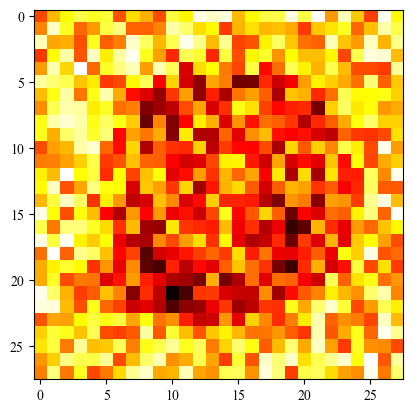

In [ ]:
#Visualize what my single neuron is learning 
d["w"].shape
plt.imshow(d["w"].reshape((28,28)), cmap='hot')

<Figure size 1000x1600 with 0 Axes>

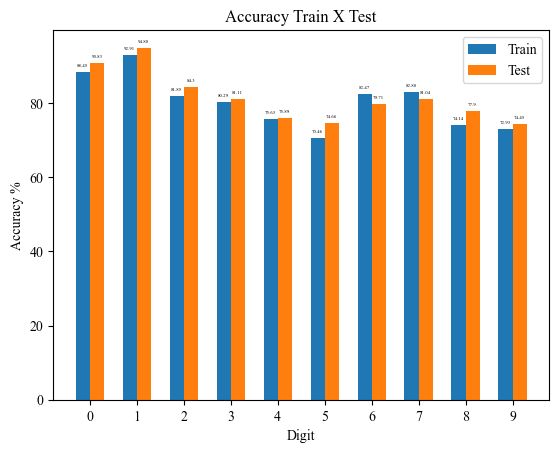

In [ ]:
#Plot accuracy for test and training for each digit model  
# Sample data
categories = [str(i) for i in range(10)]
values1 = train_accuracy_digits  # Values for the first set of bars
values2 = test_accuracy_digits   # Values for the second set of bars

x = np.arange(len(categories))  # the label locations
width = 0.30  # the width of the bars
plt.rcParams.update({'font.family': 'serif', 'font.serif': ['Times New Roman']})

plt.figure(figsize=(10, 16))
fig, ax = plt.subplots()

bars1 = ax.bar(x - width/2, values1, width, label='Train')
bars2 = ax.bar(x + width/2, values2, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy %')
ax.set_title('Accuracy Train X Test')
ax.set_xlabel("Digit")
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Label each bar with their respective values
def autolabel(bars):
    """Attach a text label above each bar in *bars*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
       
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=3.5)

autolabel(bars1)
autolabel(bars2)

plt.savefig('part1_1000iter_001_lr.png', dpi=300)  # You can change the file format and DPI as needed

plt.show()

## PART 2


In [48]:
def model_part2(X_train, Y_train, X_test, Y_test, layer_1 =100, output=10, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    
    w_1= np.random.randn(layer_1, X_train.shape[1])
    b_1= 0

    w_2=np.random.randn(output, layer_1)
    b_2=0
    # break
#     print("new w ", w)
    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize_part2(w_1=w_1, b_1=b_1, w_2=w_2, b_2=b_2, X=X_train, Y=Y_train, learning_rate=learning_rate, num_iterations=num_iterations)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w_1 = parameters["w_1"]
    b_1 = parameters["b_1"]
    w_2 = parameters["w_2"]
    b_2 = parameters["b_2"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_train = predict_part2(w_1, b_1, w_2, b_2, X_train)
    Y_prediction_test = predict_part2(w_1, b_1, w_2, b_2, X_test)
   
    
    ### END CODE HERE ###

    # # Print train/test Errors
    train_acc = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_acc = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100
    print("train accuracy: {} %".format(train_acc))
    print("test accuracy: {} %".format(test_acc))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w_1" : w_1, 
         "b_1" : b_1,
        "w_2" : w_2, 
         "b_2" : b_2,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,
         "train_acc":train_acc,
         "test_acc":test_acc}
    
    return d

In [49]:
def relu(x):
        return np.maximum(0, x)

In [51]:
def optimize_part2(w_1,b_1,w_2, b_2, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate_part2(w_1=w_1, b_1=b_1,w_2=w_2, b_2=b_2, X=X, Y=Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw_1 = grads["dw_1"]
        db_1 = grads["db_1"]
        dw_2 = grads["dw_2"]
        db_2 = grads["db_2"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w_1 = w_1 - (learning_rate * dw_1)
        b_1 = b_1 - (learning_rate * db_1)
        w_2 = w_2 - (learning_rate * dw_2)
        b_2 = b_2 - (learning_rate * db_2)
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w_1": w_1,
              "b_1": b_1, 
              "w_2": w_2,
              "b_2": b_2
              }
    
    grads = {"dw_1": dw_1,
             "db_1": db_1,
             "dw_2": dw_2,
             "db_2": db_2,  
             }
    
    return params, grads, costs

In [52]:
def softmax(x):
    """
    Compute softmax values for each sets of scores in x.
    
    Arguments:
    x -- A numpy array of shape (n_samples, n_classes)
    
    Returns:
    A numpy array of shape (n_samples, n_classes) containing the softmax values.
    """
    # Subtract the maximum value from each element of x for numerical stability
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    
    # Compute softmax values for each sample
    softmax_scores = exp_x / np.sum(exp_x, axis=1, keepdims=True)
    
    return softmax_scores

In [53]:
def predict_part2(w_1, b_1,w_2, b_2, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[0]
    Y_prediction = np.zeros((m,1))
  
    
    z_1=np.dot( X,w_1.T) #better to compute it in separate for backprop later 
    z_1 = z_1 + b_1  
    A_1 = relu(z_1)    #Non-linear act of first layer 
    A_2 = softmax(np.dot(A_1, w_2.T) + b_2)
    
    predictions = np.argmax(A_2, axis=1)
    Y_prediction = predictions

    ### END CODE HERE ###

    
    assert(Y_prediction.shape == (m,))
    
    return Y_prediction

In [54]:
def one_hot_encode(y, num_classes):
        one_hot = np.zeros((y.shape[0], num_classes))
        for i, val in enumerate(y):
            one_hot[i, val] = 1
        return one_hot

In [55]:
def relu_derivative(x):
        return np.where(x > 0, 1, 0)

In [56]:
def propagate_part2(w_1, b_1,w_2,b_2, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    # print("M", m)
    epsilon = 1e-8
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    z_1=np.dot( X,w_1.T) #better to compute it in separate for backprop later 
    z_1 = z_1 + b_1  
    A_1 = relu(z_1)    #Non-linear act of first layer 
    A_2 = softmax(np.dot(A_1, w_2.T) + b_2) #linear transf + nonlinear act of output layer
    

    # compute cost
    y_pred = np.clip(A_2, epsilon, 1 - epsilon) # we want to clip the values to avoid log 0 --> it causes NaN
    # print("Shape ", one_hot_encode(Y,10).shape)
    cost=  -np.mean(np.sum(one_hot_encode(Y,10) * np.log(y_pred), axis=1))
    # print(one_hot_encode(Y,10)[:10])
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dz_2= A_2- one_hot_encode(Y, A_2.shape[1])
    dw_2 =(1/m)* np.dot(dz_2.T, A_1) 
    db_2 = (1/m) * np.sum(dz_2)
    da_1 = np.dot(dz_2, w_2)
    dA_1_clip = np.clip(A_1, 0, None)  # Clip negative values to 0
    dA_1_clip[dA_1_clip > 0] = 1  # Set positive values to 1 (derivative of ReLU)
    dz_1 = da_1 * dA_1_clip

    # print("shape dz1 ",dz_1.shape)
    dw_1 = (1/m) * np.dot(dz_1.T, X)
    db_1 = (1/m) * np.sum(dz_1)
    ### END CODE HERE ###

    assert(dw_1.shape == w_1.shape)
    assert(db_1.dtype == float)
    assert(db_2.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw_1": dw_1,
             "db_1": db_1, 
             "dw_2": dw_2,
             "db_2": db_2,
             }
    
    return grads, cost

In [33]:
(train_images, Y_train), (test_images, Y_test) = mnist.load_data()

test_images = test_images.reshape((test_images.shape[0], -1))
X_test = test_images / 255.0
train_images = train_images.reshape((train_images.shape[0], -1))
X_train = train_images / 255.0

d_2000_0005 = model_part2(X_train, Y_train, X_test, Y_test,print_cost=True, num_iterations=2000, learning_rate=0.005)


A2 shape  (60000, 10)
Predictions  (60000,)
Shape y pred  (60000, 1)
New y pred shape  (60000,)
A2 shape  (10000, 10)
Predictions  (10000,)
Shape y pred  (10000, 1)
New y pred shape  (10000,)
Y_prediction train [5 0 9 1 9 2 1 3 1 4 3 5 3 6 1 7 3 8 6 9 4 0 9 1 7 2 4 3 7 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 5 3 3 0 7 5 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 7 7 0 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]
Y_train  [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]
Y_train shape  (60000,)
train accuracy: 58.37 %
test accuracy: 57.440000000000005 %


2000 Epochs | hidden layer = 100 nodes | lr = 0.005
<ul>
<li>train accuracy: 58.37 %</li>
<li>test accuracy: 57.440000000000005 %</li>
</ul> 

In [34]:
d_1000_0005 = model_part2(X_train, Y_train, X_test, Y_test,print_cost=True, num_iterations=1000, learning_rate=0.005)


A2 shape  (60000, 10)
Predictions  (60000,)
Shape y pred  (60000, 1)
New y pred shape  (60000,)
A2 shape  (10000, 10)
Predictions  (10000,)
Shape y pred  (10000, 1)
New y pred shape  (10000,)
Y_prediction train [5 0 4 1 9 8 1 3 1 4 3 6 3 6 1 7 2 8 6 9 4 0 9 1 6 2 4 3 7 7 3 8 6 9 0 0 6
 0 7 6 1 8 7 9 3 9 8 5 5 3 3 0 7 7 9 8 0 7 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 0 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]
Y_train  [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]
Y_train shape  (60000,)
train accuracy: 42.955 %
test accuracy: 46.25 %


1000 Epochs | hidden layer = 100 nodes | lr = 0.005 <br>
<ul>
<li> train accuracy: 42.955 % </li> 
<li> test accuracy: 46.25 % </li> 
</ul>

In [35]:
d_1000_005 = model_part2(X_train, Y_train, X_test, Y_test,print_cost=True, num_iterations=1000, learning_rate=0.05)


A2 shape  (60000, 10)
Predictions  (60000,)
Shape y pred  (60000, 1)
New y pred shape  (60000,)
A2 shape  (10000, 10)
Predictions  (10000,)
Shape y pred  (10000, 1)
New y pred shape  (10000,)
Y_prediction train [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Y_train  [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]
Y_train shape  (60000,)
train accuracy: -345.3933333333334 %
test accuracy: -344.34 %


1000 Epochs | hidden layer = 100 nodes | lr = 0.05 <br>
<ul>
<li> train accuracy: -345.3933333333334 % </li> 
<li> test accuracy: -344.34 % </li> 
<ul>

In [36]:
d_1000_001 = model_part2(X_train, Y_train, X_test, Y_test,print_cost=True, num_iterations=1000, learning_rate=0.01)

A2 shape  (60000, 10)
Predictions  (60000,)
Shape y pred  (60000, 1)
New y pred shape  (60000,)
A2 shape  (10000, 10)
Predictions  (10000,)
Shape y pred  (10000, 1)
New y pred shape  (10000,)
Y_prediction train [3 0 4 1 9 2 1 3 1 4 3 8 3 6 1 7 2 8 6 9 4 0 9 1 2 2 4 3 7 0 3 1 6 7 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 3 3 3 0 7 5 7 8 0 9 4 1 4 4 6 0 4 6 6 1 0 0 2 7 1 6
 3 0 8 1 1 7 2 0 2 6 7 8 0 9 0 4 6 7 4 6 8 0 7 8 3 1]
Y_train  [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]
Y_train shape  (60000,)
train accuracy: 45.166666666666664 %
test accuracy: 48.209999999999994 %


1000 Epochs | hidden layer = 100 nodes | lr = 0.01
<ul>
<li>train accuracy: 45.166666666666664 % </li> 
<li>test accuracy: 48.209999999999994 %</li> 
</ul>

In [37]:
d_2000_0005 = model_part2(X_train, Y_train, X_test, Y_test,print_cost=True, num_iterations=10000, learning_rate=0.005)

A2 shape  (60000, 10)
Predictions  (60000,)
Shape y pred  (60000, 1)
New y pred shape  (60000,)
A2 shape  (10000, 10)
Predictions  (10000,)
Shape y pred  (10000, 1)
New y pred shape  (10000,)
Y_prediction train [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 5 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 0 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]
Y_train  [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]
Y_train shape  (60000,)
train accuracy: 79.76 %
test accuracy: 74.52 %


10000 Epochs | hidden layer = 100 nodes | lr = 0.005
<ul>
<li>train accuracy: 79.76 %</li> 
<li>test accuracy: 74.52 %</li> 
</ul>

In [40]:
d_1000_0005 = model_part2(X_train, Y_train, X_test, Y_test,print_cost=True, num_iterations=1000, learning_rate=0.005, layer_1=200)

A2 shape  (60000, 10)
Predictions  (60000,)
Shape y pred  (60000, 1)
New y pred shape  (60000,)
A2 shape  (10000, 10)
Predictions  (10000,)
Shape y pred  (10000, 1)
New y pred shape  (10000,)
Y_prediction train [3 0 4 1 4 4 1 3 1 4 3 0 3 6 1 7 2 8 0 9 4 0 9 1 2 2 4 3 7 8 3 3 6 7 0 3 6
 0 7 6 1 8 9 9 3 9 5 5 5 3 3 0 7 5 9 8 0 9 4 1 2 4 6 0 6 3 6 1 0 0 1 4 1 6
 3 0 2 1 1 7 8 0 2 6 7 8 5 9 0 4 6 7 2 6 8 0 7 8 3 1]
Y_train  [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]
Y_train shape  (60000,)
train accuracy: 27.185000000000002 %
test accuracy: 28.42 %


1000 Epochs | hidden layer = 100 nodes | lr = 0.005
<ul>
<li>train accuracy: 27.185000000000002%</li> 
<li>test accuracy: 28.42%</li> 
</ul>

In [41]:
d_64n_1000_0005 = model_part2(X_train, Y_train, X_test, Y_test,print_cost=True, num_iterations=1000, learning_rate=0.005, layer_1=64)

A2 shape  (60000, 10)
Predictions  (60000,)
Shape y pred  (60000, 1)
New y pred shape  (60000,)
A2 shape  (10000, 10)
Predictions  (10000,)
Shape y pred  (10000, 1)
New y pred shape  (10000,)
Y_prediction train [3 0 4 1 4 2 1 3 1 4 3 3 3 6 1 7 2 8 6 9 4 0 9 1 5 2 4 3 2 8 3 8 6 7 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 5 3 3 0 7 9 7 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 2 7 1 6
 3 0 2 1 1 7 3 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]
Y_train  [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]
Y_train shape  (60000,)
train accuracy: 45.873333333333335 %
test accuracy: 48.199999999999996 %


The experiments I did with 100 and 64 nodes in the hidden layer pushed me to try with a lower number of nodes. That's why in my report I focus on the experiments with 32 nodes only (Please refer to it for a further explanation). 

In [57]:
d_32n_1000_0005 = model_part2(X_train, Y_train, X_test, Y_test,print_cost=True, num_iterations=1000, learning_rate=0.005, layer_1=32)

train accuracy: 26.230000000000004 %
test accuracy: 29.629999999999995 %


In [58]:
d_32n_2000_0005 = model_part2(X_train, Y_train, X_test, Y_test,print_cost=True, num_iterations=2000, learning_rate=0.005, layer_1=32)

train accuracy: 54.41666666666667 %
test accuracy: 55.9 %


2000 Epochs | hidden layer = 32 nodes | lr = 0.005
<ul>
<li>train accuracy:  50.714999999999996 %</li> 
<li>test accuracy: 50.690000000000005 % </li> 
</ul>

In [59]:
d_32n_10000_0005 = model_part2(X_train, Y_train, X_test, Y_test,print_cost=True, num_iterations=10000, learning_rate=0.005, layer_1=32)

train accuracy: 76.70666666666666 %
test accuracy: 74.12 %


10000 Epochs | hidden layer = 32 nodes | lr = 0.005
<ul>
<li>train accuracy: </li> 
<li>test accuracy: </li> 
</ul>

In [60]:
d_32n_5000_0005 = model_part2(X_train, Y_train, X_test, Y_test,print_cost=True, num_iterations=5000, learning_rate=0.005, layer_1=32)

train accuracy: 69.75666666666666 %
test accuracy: 68.15 %


In [61]:
d_32n_1000_005 = model_part2(X_train, Y_train, X_test, Y_test,print_cost=True, num_iterations=1000, learning_rate=0.05, layer_1=32)


train accuracy: -345.3933333333334 %
test accuracy: -344.34 %


In [62]:
d_32n_2000_005 = model_part2(X_train, Y_train, X_test, Y_test,print_cost=True, num_iterations=2000, learning_rate=0.05, layer_1=32)

train accuracy: -345.3933333333334 %
test accuracy: -344.34 %


In [63]:
d_32n_5000_005 = model_part2(X_train, Y_train, X_test, Y_test,print_cost=True, num_iterations=5000, learning_rate=0.05, layer_1=32)

train accuracy: -290.81666666666666 %
test accuracy: -291.12 %


In [64]:
d_32n_10000_005 = model_part2(X_train, Y_train, X_test, Y_test,print_cost=True, num_iterations=10000, learning_rate=0.05, layer_1=32)

train accuracy: -248.37833333333333 %
test accuracy: -248.47000000000003 %


5000 Epochs | hidden layer = 32 nodes | lr = 0.05
<ul>
<li>train accuracy: </li> 
<li>test accuracy:  </li> 
</ul>

<h6> Collecting Accuracy Data </h6> 

In [65]:
list_runs =[d_2000_0005, d_1000_0005, d_1000_005, d_1000_001, d_2000_0005, d_1000_0005, d_64n_1000_0005 , d_32n_2000_0005, d_32n_10000_0005,d_32n_5000_0005]
list_run_32nodes_0005 = [d_32n_1000_0005, d_32n_2000_0005, d_32n_5000_0005, d_32n_10000_0005]
list_run_32_nodes_xaxis=[2000,5000,10000]
list_run_32nodes_005  = [d_32n_1000_005, d_32n_2000_005, d_32n_5000_005, d_32n_10000_005]
list_run_100_nodes = [d_2000_0005, d_1000_0005, d_1000_005, d_1000_001, d_2000_0005, d_1000_0005]


In [81]:
#collect accuracy of all runs with the hyperperameters reported in the paper
acc_train_005 = []
acc_test_005=[]
acc_train_0005 = []
acc_test_0005=[]
print("------**-----**--------**-----**------")
for i in list_run_32nodes_0005:
    print(f"Train: {i['train_acc']} x Test:{i['test_acc']}")
    acc_train_0005.append(i['train_acc'])
    acc_test_0005.append(i['test_acc'])
print("------**-----**--------**-----**------")
for i in list_run_32nodes_005:
    acc_train_005.append(i['train_acc'])
    acc_test_005.append(i['test_acc'])
    print(f"Train: {i['train_acc']} x Test:{i['test_acc']}")



------**-----**--------**-----**------
Train: 26.230000000000004 x Test:29.629999999999995
Train: 54.41666666666667 x Test:55.9
Train: 69.75666666666666 x Test:68.15
Train: 76.70666666666666 x Test:74.12
------**-----**--------**-----**------
Train: -345.3933333333334 x Test:-344.34
Train: -345.3933333333334 x Test:-344.34
Train: -290.81666666666666 x Test:-291.12
Train: -248.37833333333333 x Test:-248.47000000000003


<Figure size 1000x1600 with 0 Axes>

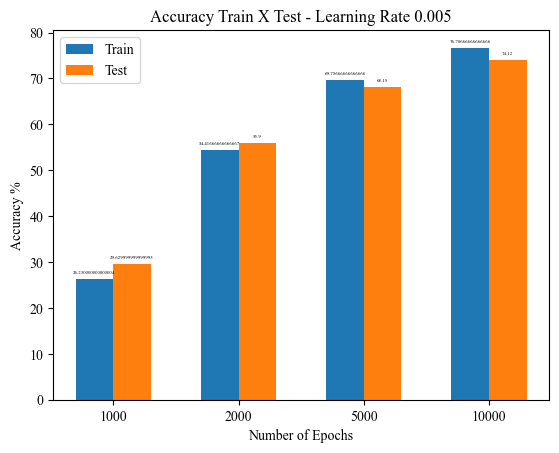

In [85]:
#plot train vs accuracy for different epoch lr = 0.005

categories = [1000,2000,5000,10000]
values1 = acc_train_0005  # Values for the first set of bars
values2 = acc_test_0005   # Values for the second set of bars

x = np.arange(len(categories))  # the label locations
width = 0.30  # the width of the bars
plt.rcParams.update({'font.family': 'serif', 'font.serif': ['Times New Roman']})

plt.figure(figsize=(10, 16))
fig, ax = plt.subplots()

bars1 = ax.bar(x - width/2, values1, width, label='Train')
bars2 = ax.bar(x + width/2, values2, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy %')
ax.set_title('Accuracy Train X Test - Learning Rate 0.005')
ax.set_xlabel("Number of Epochs")
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Label each bar with their respective values
def autolabel(bars):
    """Attach a text label above each bar in *bars*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
       
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=3.5)

autolabel(bars1)
autolabel(bars2)

plt.savefig('part2_32n_0005lr.png', dpi=300)  # You can change the file format and DPI as needed

plt.show()

<Figure size 1000x1600 with 0 Axes>

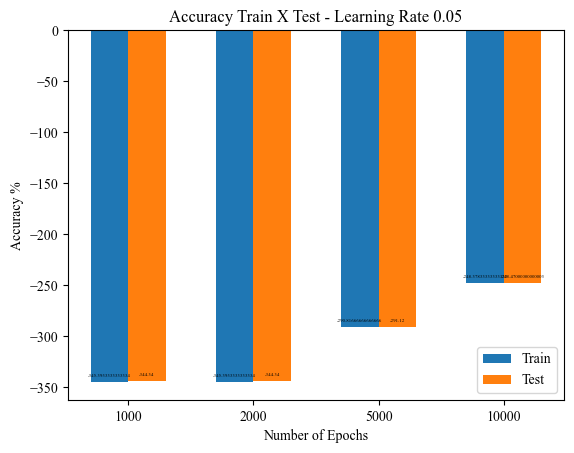

In [84]:
#plot train vs accuracy for different epoch lr = 0.05
categories = [1000,2000,5000,10000]
values1 = acc_train_005  # Values for the first set of bars
values2 = acc_test_005   # Values for the second set of bars

x = np.arange(len(categories))  # the label locations
width = 0.30  # the width of the bars
plt.rcParams.update({'font.family': 'serif', 'font.serif': ['Times New Roman']})

plt.figure(figsize=(10, 16))
fig, ax = plt.subplots()

bars1 = ax.bar(x - width/2, values1, width, label='Train')
bars2 = ax.bar(x + width/2, values2, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy %')
ax.set_title('Accuracy Train X Test - Learning Rate 0.05')
ax.set_xlabel("Number of Epochs")
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Label each bar with their respective values
def autolabel(bars):
    """Attach a text label above each bar in *bars*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
       
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=3.5)

autolabel(bars1)
autolabel(bars2)

plt.savefig('part2_32n_005lr.png', dpi=300)  # You can change the file format and DPI as needed

plt.show()

In [94]:
#collect costs 
print("------**-----**--------**-----**------")
cost_0005 =[]
cost_005 = []
for i in list_run_32nodes_0005:
    print(f"Cost: {len(i['costs'])}")
    cost_0005.append(i['costs'])
print("------**-----**--------**-----**------")
for i in list_run_32nodes_005:
    cost_005.append(i['costs'])
    print(f"Cost: {len(i['costs'])}")

------**-----**--------**-----**------
Cost: 10
Cost: 20
Cost: 50
Cost: 100
------**-----**--------**-----**------
Cost: 10
Cost: 20
Cost: 50
Cost: 100


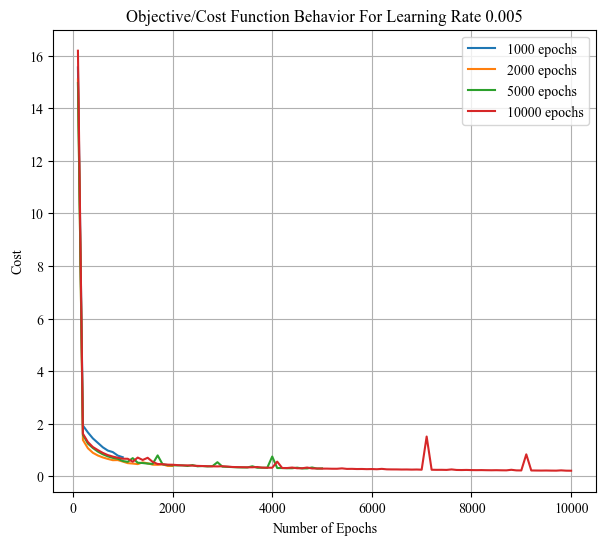

In [101]:
# Plotting cost per epoch for lr = 0.005
plt.figure(figsize=(7, 6))
epochs_1000 = [i * 100 for i in range(1, 11)] 
epochs_2000 = [i * 100 for i in range(1, 21)]
epochs_5000 = [i * 100 for i in range(1, 51)]
epochs_10000 = [i * 100 for i in range(1, 101)]

plt.plot(epochs_1000, cost_0005[0], label='1000 epochs')
plt.plot(epochs_2000, cost_0005[1], label='2000 epochs')
plt.plot(epochs_5000, cost_0005[2], label='5000 epochs')
plt.plot(epochs_10000, cost_0005[3], label='10000 epochs')

plt.xlabel('Number of Epochs')
plt.ylabel('Cost')
plt.title('Objective/Cost Function Behavior For Learning Rate 0.005')
plt.legend()
plt.grid(True)
plt.savefig("./cost_0005.png")
plt.show()

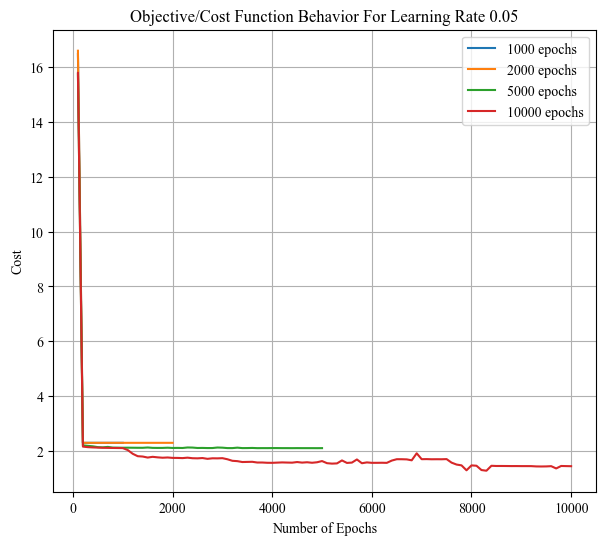

In [102]:
# Plotting cost per epoch for lr = 0.05
plt.figure(figsize=(7, 6))
epochs_1000 = [i * 100 for i in range(1, 11)] 
epochs_2000 = [i * 100 for i in range(1, 21)]
epochs_5000 = [i * 100 for i in range(1, 51)]
epochs_10000 = [i * 100 for i in range(1, 101)]

plt.plot(epochs_1000, cost_005[0], label='1000 epochs')
plt.plot(epochs_2000, cost_005[1], label='2000 epochs')
plt.plot(epochs_5000, cost_005[2], label='5000 epochs')
plt.plot(epochs_10000, cost_005[3], label='10000 epochs')

plt.xlabel('Number of Epochs')
plt.ylabel('Cost')
plt.title('Objective/Cost Function Behavior For Learning Rate 0.05')
plt.legend()
plt.grid(True)
plt.savefig("./cost_005.png")
plt.show()